In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from pathlib import Path
import sys
proj_dir = Path.cwd().parent

sys.path.append(str(proj_dir))


In [4]:
from datasets import load_dataset

In [10]:
dataset = load_dataset('derek-thomas/dataset-creator-askreddit', download_mode="reuse_cache_if_exists", ignore_verifications=True)

Using custom data configuration derek-thomas--dataset-creator-askreddit-806417599346c17a


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating all_days split:   0%|          | 0/2468888 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /Users/derekthomas/.cache/huggingface/datasets/derek-thomas___parquet/derek-thomas--dataset-creator-askreddit-806417599346c17a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
df = dataset['all_days'].to_pandas()
df

score  num_comments  \
0            2             4   
1            5            24   
2            1             5   
3            0            18   
4           11            29   
...        ...           ...   
3293628      1             1   
3293629      2             0   
3293630      0            11   
3293631   1452          3140   
3293632      2             9   

                                                     title  \
0        Reddit, if someone had to describe you to a st...   
1        What kind of car does the average \nRedditor d...   
2        What movies have made you go back to the theat...   
3                                           Worst fear(s)?   
4        If there was a type of ink that lasted only fo...   
...                                                    ...   
3293628              Help me get an idea of cost of living   
3293629  If you used a prism to separate light and then...   
3293630  Reddit, what was it like the first time you go...   
3293631  People who refuse to be organ donors, why do y...   
3293632        What always happens when you travel abroad?   

                                                 permalink  \
0        /r/AskReddit/comments/15sn6y/reddit_if_someone...   
1        /r/AskReddit/comments/15sn6m/what_kind_of_car_...   
2        /r/AskReddit/comments/15sn6b/what_movies_have_...   
3                /r/AskReddit/comments/15sn4u/worst_fears/   
4        /r/AskReddit/comments/15sn44/if_there_was_a_ty...   
...                                                    ...   
3293628  /r/AskReddit/comments/2cjj63/help_me_get_an_id...   
3293629  /r/AskReddit/comments/2cjj5v/if_you_used_a_pri...   
3293630  /r/AskReddit/comments/2cjj4s/reddit_what_was_i...   
3293631  /r/AskReddit/comments/2cjj31/people_who_refuse...   
3293632  /r/AskReddit/comments/2cjj2a/what_always_happe...   

                                                  selftext  \
0        They would be talking about you without your p...   
1        I've always wanted to know what kind of car th...   
2                                                            
3                      So what is your worst fear, reddit?   
4                                                            
...                                                    ...   
3293628                                                      
3293629                                                      
3293630                                                      
3293631                                     R.I.P my inbox   
3293632                                                      

                                                       url  \
0        http://www.reddit.com/r/AskReddit/comments/15s...   
1        http://www.reddit.com/r/AskReddit/comments/15s...   
2        http://www.reddit.com/r/AskReddit/comments/15s...   
3        http://www.reddit.com/r/AskReddit/comments/15s...   
4        http://www.reddit.com/r/AskReddit/comments/15s...   
...                                                    ...   
3293628  http://www.reddit.com/r/AskReddit/comments/2cj...   
3293629  http://www.reddit.com/r/AskReddit/comments/2cj...   
3293630  http://www.reddit.com/r/AskReddit/comments/2cj...   
3293631  http://www.reddit.com/r/AskReddit/comments/2cj...   
3293632  http://www.reddit.com/r/AskReddit/comments/2cj...   

                 created_utc         author      id  downs   ups  
0        2013-01-01 23:59:40      [deleted]  15sn6y      0     2  
1        2013-01-01 23:59:31    PaytonAdams  15sn6m      0     5  
2        2013-01-01 23:59:20      [deleted]  15sn6b      0     1  
3        2013-01-01 23:58:37      [deleted]  15sn4u      0     0  
4        2013-01-01 23:58:15     Honeybeard  15sn44      0    11  
...                      ...            ...     ...    ...   ...  
3293628  2014-08-04 00:01:20      bbent4698  2cjj63      0     1  
3293629  2014-08-04 00:01:19        Ajmb_88  2cjj5v      0     2  
3293630  2014-08-04 00:01:01       da-gon

In [16]:
df.convert_dtypes().dtypes

score            Int64
num_comments     Int64
title           string
permalink       string
selftext        string
url             string
created_utc     string
author          string
id              string
downs            Int64
ups              Int64
dtype: object

In [18]:
import pandas as pd

In [21]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['date'] = df['created_utc'].dt.date
df['time'] = df['created_utc'].dt.time

<Axes: >

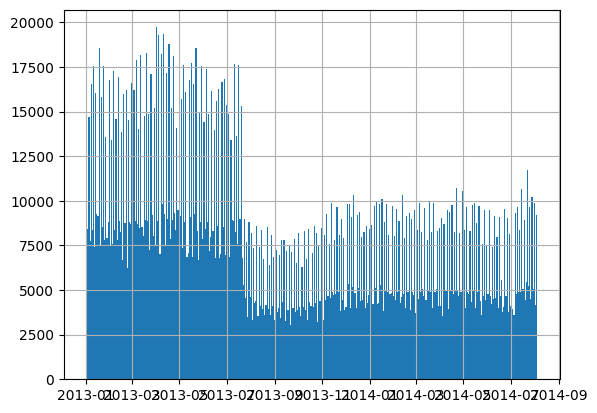

In [25]:
df.date.hist(bins=400)

In [26]:
new_df = df.drop_duplicates(subset=['id'], keep="first")

In [ ]:
new_df.date.hist(bins-)